In [ ]:
#add load diabetes code also
#change alpha ,lambda and n_iter

In [ ]:
import numpy as np
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X,y=datasets.make_regression(n_samples=442,n_features=10,noise=1,random_state=42)
X_train_temp1=X[0:300,:]
X_train=np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0]=np.ones((X_train_temp1.shape[0]))
X_train[:,1:]=X_train_temp1
y_train=y[0:300]
X_test_temp1=X[300:442,:]
X_test=np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0]=np.ones((X_test_temp1.shape[0]))
X_test[:,1:]=X_test_temp1
y_test=y[300:442]

In [ ]:
theta=np.random.uniform(0,1,size=(X_train.shape[1]))
theta2=np.random.uniform(0,1,size=(X_train.shape[1]))#without regularization

theta: [-6.38041413e-02  6.38690993e+01  5.77454943e+01  3.07512748e+01
  2.64812186e+01  4.44055612e+00  6.61242001e+01  3.41416195e+01
  1.18901891e+01  6.35418422e+01  6.89444847e+01]
theta shape: (11,)
theta2: [4.90387645e-01 2.30986983e-02 9.03464293e-01 7.12970718e-01
 4.59032544e-01 4.81703231e-02 2.85138244e-01 7.32460094e-01
 3.39434708e-01 3.56114633e-01 9.88536807e+01]
MAE: 4.107357606950399
MSE: 26.152311199882476


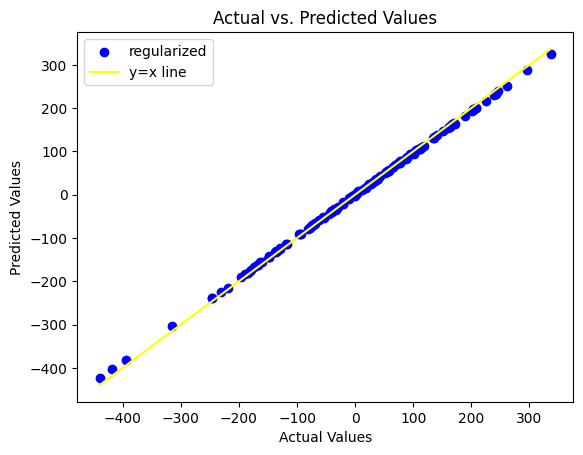

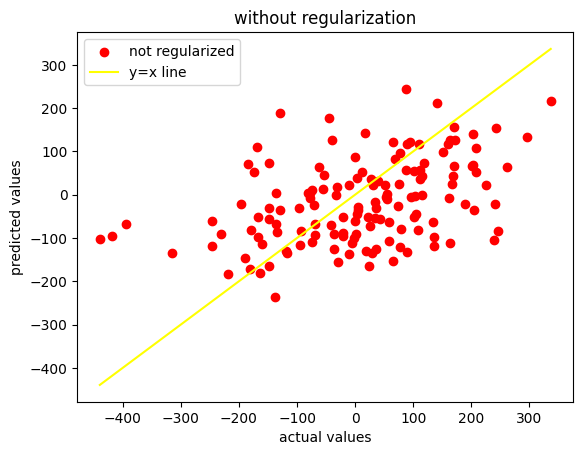

In [ ]:
n_iter=1000
alpha=0.01
m=X_train.shape[0]
n=X_train.shape[1]
lambda_=10
for i in range(n_iter):
   derivative=np.zeros(n)#with regularization
   update=np.zeros(n)#without regularization
   y_pred=np.dot(X_train,theta)
   error=y_pred-y_train
   for j in range(n):
    derivative[j]=np.sum(error*(X_train.T)[j])
    update[j]=np.sum(error*(X_train.T)[j])
   theta[0]=theta[0] - (1/m)*(alpha)*derivative[0]
   theta[1:]=theta[1:]*(1-(alpha*lambda_/m))-(1/m)*(alpha)*derivative[1:]
   theta2[j]=theta2[j]-(1/m)*(alpha)*update[j]
print("theta:",theta)
print("theta shape:",theta.shape)
print("theta2:",theta2)
predictions=np.dot(X_test,theta)
print("MAE:",metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:",metrics.mean_squared_error(y_true=y_test,y_pred=predictions))
predictions2=np.dot(X_test,theta2)#without regularization
''' this will create a scatter plot where the x-axis
represents the actual target values (y_test), and the y-axis
represents the predicted values. Ideally, the points should form a
roughly straight line with a slope of 1 if predictions match the actual values well.'''
plt.scatter(y_test,predictions,color="blue",label="regularized")
#to create x=y line
x_values=np.linspace(min(y_test),max(y_test),100)
y_values=x_values
plt.plot(x_values,y_values,color="yellow",label="y=x line")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title("Actual vs. Predicted Values(with regularization)")
plt.legend()
plt.show()
plt.scatter(y_test,predictions2,color="red",label="not regularized")
plt.plot(x_values,y_values,color="yellow",label="y=x line")
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.title('without regularization')
plt.legend()
plt.show()
